<a href="https://colab.research.google.com/github/aliahalotaibi73/week3_Day3_exercises/blob/main/K_means_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1 : Import the necessary Libraries
### import iris dataset


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
import pandas as pd

#Step 2 : Load the iris Dataset

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

#Step 3 : Elbow Method
Finding the ideal number of groups to divide the data into is a basic stage in any unsupervised algorithm. One of the most common techniques for figuring out this ideal value of k is the elbow approach.





In [11]:
# Elbow method to know the better number cluster it is 4 or 3 and so on. To know the better K in the bigining.
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#Step 4 : Plot the Elbow graph to find the optimum number of cluster



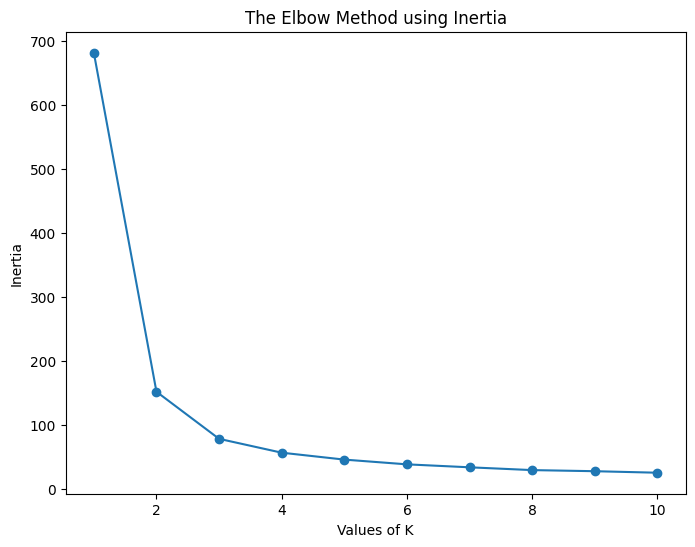

In [20]:
fig = plt.figure(figsize=(8,6))
plt.plot
plt.plot(k_range, inertia, marker='o' )
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

The plot displays a scatter plot of data points (X[:,0], X[:,1]) with grid lines. It also marks the initial cluster centers (red stars) generated for K-means clustering.



#Step 5 : Build the Kmeans clustering model



*   Find the cluster center
*   Predict the cluster group





In [43]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

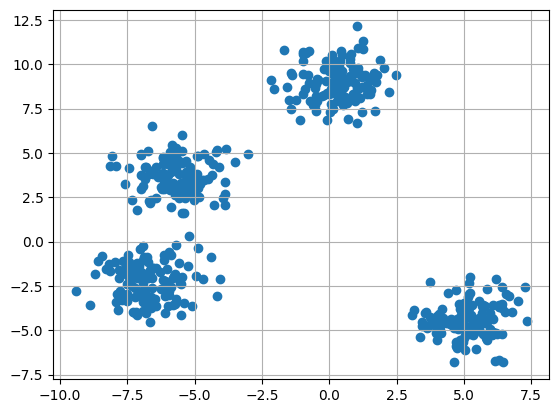

In [44]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [47]:
k = 4

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []}}

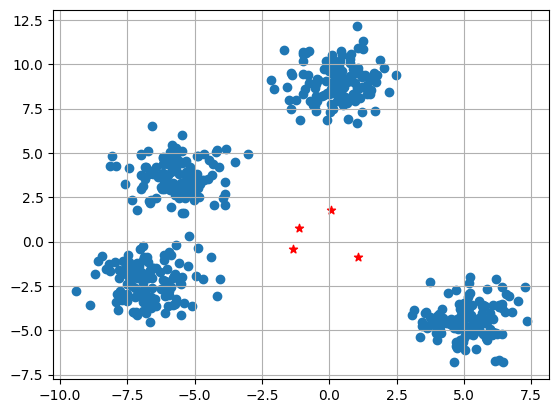

In [48]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [49]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [50]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]): # x means all data and we will take a look for all of them
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist) #argmin take the min des and give it to me
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step , update the center
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


In [51]:
def pred_cluster(X, clusters): #calculate the des and based on it clasify the points
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [52]:
for i in range(10):
    clusters = assign_clusters(X,clusters)
    clusters = update_clusters(X,clusters)
    pred = pred_cluster(X,clusters)

#Step 6 : Predict the cluster group

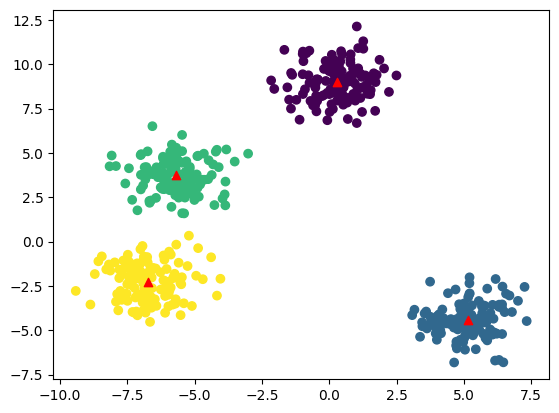

In [53]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

#**Well done :)**
